In [51]:
import sys
sys.path.append('../src')

from module.module import Linear
from module.activation import TanH, Softmax, ReLU

from loss.loss import CrossEntropie, CELogSoftmax
from networks.optim import Optim
from networks.sequentiel import Sequentiel

from utils.generation import generate_linear_data, generate_data_gauss
from utils.plots import plot_net, net_to_graph
from utils.processing import one_hot_y

import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
def cara_to_int(labels):
    chars = np.unique(labels)

    l = []

    for let in labels:
        for i,cara in enumerate(chars):
            if let == cara:
                l.append(i)

    return np.array(l)

In [3]:
def normalisation(data):
    dt = data.copy()
    for i in range(data.shape[1]):
        mini = np.min(data[:,i])
        maxi = np.max(data[:,i])
        if maxi == mini:
            if maxi > 0:
                dt[:,i] = 1
            else:
                dt[:,i] = 0
        else:dt[:,i] = (data[:,i] - mini) / (maxi - mini)
    return dt

In [5]:
letters_data = pd.read_csv("../data/digital_letters.csv")

In [6]:
letters_data = np.array(letters_data)
letters_labels = cara_to_int(letters_data[:,-1])
letters_data = letters_data[:,1:-1]

letters_data = letters_data.astype('float')
letters_data = normalisation(letters_data)

indices = np.random.permutation(letters_data.shape[0])

n_samples = int(len(letters_data) * 0.7)

X_train_letters = letters_data[indices[:n_samples]]
Y_train_letters = letters_labels[indices[:n_samples]]

X_test_letters = letters_data[indices[n_samples:]]
Y_test_letters = letters_labels[indices[n_samples:]]

In [7]:
X_train_letters.shape

(9191, 784)

In [10]:
np.unique(Y_train_letters)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

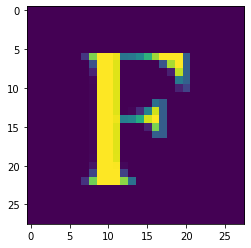

In [15]:
plt.imshow(X_train_letters[Y_train_letters == 5][0].reshape(28, 28))

In [16]:
classes = len(np.unique(Y_train_letters))

input_neurons = X_train_letters.shape[1]
output_neurons = classes

In [17]:
y_one_hot = one_hot_y(Y_train_letters, classes)

y_one_hot.shape

(9191, 26)

100%|██████████| 60/60 [03:06<00:00,  3.10s/it]


Training completed.


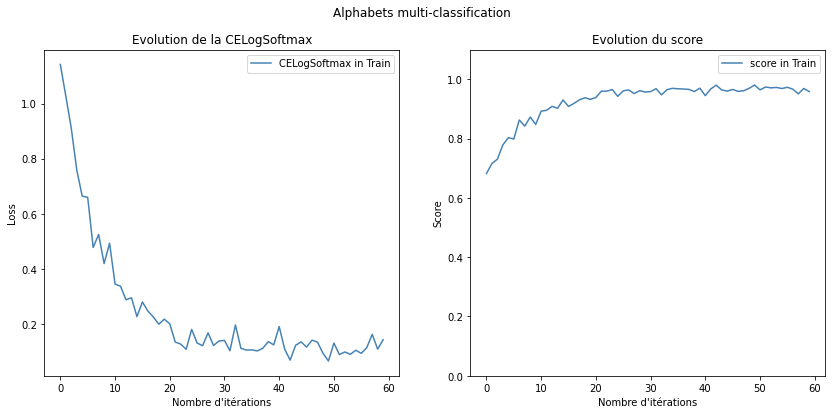

In [74]:
hidden_neurons_1 = 400
hidden_neurons_2 = 100

net = Sequentiel([
    Linear(input_neurons, hidden_neurons_1, bias=True, init="xavier"),
    TanH(),
    Linear(hidden_neurons_1, hidden_neurons_2, bias=True, init="he"),
    ReLU(),
    Linear(hidden_neurons_2, output_neurons, bias=True, init="xavier"),
], classes_type="multi")


optim = Optim(net, CELogSoftmax(), eps=1e-2)
optim.SGD(X_train_letters, y_one_hot, test_train_split=False, batch_size=10, epochs=60, verbose=False)

plot_net(optim, X_train_letters, y_one_hot, net_type="multiclass", net_title="Alphabets multi-classification")

In [75]:
net.score(X_test_letters, Y_test_letters)

0.7227722772277227

In [76]:
net.score(X_train_letters, Y_train_letters)

0.9585464040909586